In [30]:
# 분석은 정답이 없다. 어떤 피쳐를 할건가, 어떻게 가공할건가 등등 다 본인의 선택. 그러니까 다른분들 과제를 많이 봐라~

### 목표 : 무게에 따른 길이를 예측해주는 모델
- 데 이 터 : fish.csv
- 피쳐/특성 : 무게
- 라벨/타겟 : 길이

(1) 모듈 로딩 및 데이터 준비

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import sklearn

In [32]:
print(sklearn.__version__)

1.3.0


In [33]:
file = '../data/fish.csv'
fishDF = pd.read_csv(file, usecols = [0,1,2])
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [34]:
# 학습에 사용할 데이터 추출 => Perch 행만 추출
mask = (fishDF['Species'] == 'Perch')
perchDF = fishDF[mask]

# 인데긋 정리
perchDF.reset_index(drop = True, inplace = True)
perchDF

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4
5,Perch,100.0,18.0
6,Perch,78.0,18.7
7,Perch,80.0,19.0
8,Perch,85.0,19.6
9,Perch,85.0,20.0


In [35]:
# 추출된 데이터 기본 정보 확이
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [36]:
# 수치 컬럼의 데이터 정보 확인
perchDF.describe()

,Weight,Length
count,56.000000,56.000000
mean,382.239286,27.892857
std,347.617717,9.021668
min,5.900000,8.400000
25%,120.000000,21.825000
50%,207.500000,25.300000
75%,692.500000,36.625000
max,1100.000000,44.000000


(3) 데이터 전처리 <hr>
- 결측치, 이상치, 중복값 처리
- 데이터의 분포, 컬럼 분포, 최빈값, 고유값

(3-1) 데이터 분포

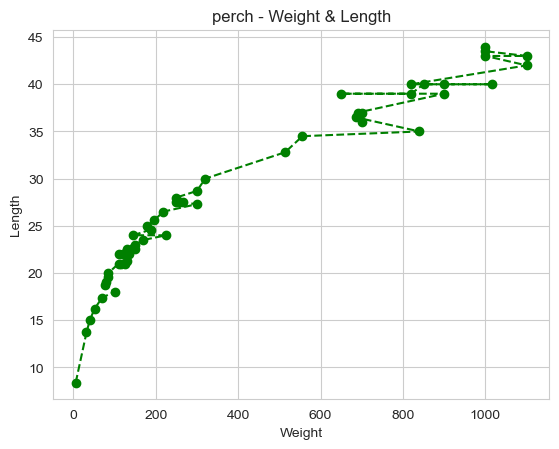

In [37]:
# 무게와 길이에 대한 시각화
plt.plot(perchDF['Weight'], perchDF['Length'], 'go--')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.title('perch - Weight & Length')
plt.show()

In [38]:
# 무게와 길이에 대한 상관계수
perchDF.corr(numeric_only=True)

# 시각화와 상관관계를 보니 비례관계가 있다는 것을 확인했다.

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [39]:
## [분석 결과] 무게에 따른 길이는 비례관계
# 무게 값 제공 ==> 길이 값 도출
# 무게 + 연산 ==> 길이
perchDF.iloc[:3]

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0


In [40]:
model = (perchDF.Weight*0.2) + 7
model - perchDF.Length

0      -0.22
1      -0.30
2       0.00
3       1.10
4       3.60
5       9.00
6       3.90
7       4.00
8       4.40
9       4.00
10      8.00
11      9.00
12     11.00
13     11.70
14      9.00
15      9.00
16     11.00
17     12.00
18      7.00
19     10.50
20     14.50
21     13.30
22     14.00
23     17.50
24     28.00
25     12.00
26     20.00
27     18.00
28     20.80
29     24.10
30     39.70
31     31.50
32     32.50
33     29.50
34     29.00
35     38.30
36     41.00
37     77.00
38     83.70
39    140.00
40    107.50
41    111.00
42    110.00
43    108.00
44    148.00
45     98.00
46    132.00
47    137.00
48    147.00
49    170.00
50    131.00
51    185.00
52    164.00
53    184.00
54    163.50
55    163.00
dtype: float64

In [41]:
# 전체에 대한 오차값
result = (model - perchDF.Length).abs().sum()

# 전체의 오차값에 대한 평균
result/len(perchDF)


# 이렇게 공식을 계산해주는 모듈이 따로 있다!
# 아래에서 해당되는 모듈을 적용해보자

55.57357142857143

(4) 학습 진행 <hr>
- 학습 방법 : 지도학습 + 회귀(예측) => 선형회귀 LinearRegression             => 이 데이터는 이게 가능하다

In [42]:
# 모델 인스턴스 생성
model = LinearRegression()

In [43]:
# 학습
model.fit(perchDF[['Weight']], perchDF['Length'])        #2차원 데이터가 들어가야한다는 점을 잊지말자

LinearRegression()

In [44]:
# 학습 후 속성 확인
print(f"피쳐에 할당되는 가중치 계수 : {model.coef_}")
print(f"수식에 사용되는 절편 계수 : {model.intercept_}")

피쳐에 할당되는 가중치 계수 : [0.02487985]
수식에 사용되는 절편 계수 : 18.382802913636723


In [45]:
(perchDF['Weight'] * model.coef_) + model.intercept_

#위의 모듈에서 나온 공식을 실제로 적용해보았다.
#이 넘은 선형회귀라서 ax+b = y 로 계산가능하다.

0     18.529594
1     19.178958
2     19.377997
3     19.664115
4     20.124392
5     20.870787
6     20.323431
7     20.373191
8     20.497590
9     20.497590
10    21.119586
11    21.243985
12    21.492784
13    21.617183
14    21.368384
15    21.368384
16    21.617183
17    21.741582
18    21.119586
19    21.617183
20    22.114780
21    21.990380
22    22.114780
23    22.612377
24    23.980768
25    21.990380
26    23.060214
27    22.861175
28    23.284132
29    23.806609
30    25.846756
31    24.851563
32    24.975962
33    24.602764
34    24.602764
35    25.846756
36    26.344353
37    31.171043
38    32.215997
39    39.281873
40    35.425497
41    35.798695
42    35.798695
43    35.549896
44    40.774664
45    34.554702
46    38.784276
47    39.530671
48    40.774664
49    43.635846
50    38.784276
51    45.750633
52    43.262648
53    45.750633
54    43.262648
55    43.262648
Name: Weight, dtype: float64

(5) 테스트 <hr>

In [46]:
# 결정계수 R2 즉, 얼마나 정답에 가깝게 근사하게 겨로가를 예측해내는지 나타내는 계수값
# 범위 : 0.0 ~ 1.0  
# 1.0에 가까울수록 잘 만들어진 모델
model.score(perchDF[['Weight']], perchDF.Length)

# score => R**2 (결정계수) 개념을 이용하여 얼마나 실제 값과 가까운지 평가하는 모듈이다.

0.919021073244782

In [47]:
y_pre = model.predict(perchDF[['Weight']])
y_pre = np.round(y_pre, 1)
y_pre

array([18.5, 19.2, 19.4, 19.7, 20.1, 20.9, 20.3, 20.4, 20.5, 20.5, 21.1,
       21.2, 21.5, 21.6, 21.4, 21.4, 21.6, 21.7, 21.1, 21.6, 22.1, 22. ,
       22.1, 22.6, 24. , 22. , 23.1, 22.9, 23.3, 23.8, 25.8, 24.9, 25. ,
       24.6, 24.6, 25.8, 26.3, 31.2, 32.2, 39.3, 35.4, 35.8, 35.8, 35.5,
       40.8, 34.6, 38.8, 39.5, 40.8, 43.6, 38.8, 45.8, 43.3, 45.8, 43.3,
       43.3])

In [48]:
# 오차 계산 => 예측값 - 정답
errorSR = y_pre - perchDF.Length
errorSR
# 예측값과 실제값 사이의 오차값을 구했다.

0     10.1
1      5.5
2      4.4
3      3.5
4      2.7
5      2.9
6      1.6
7      1.4
8      0.9
9      0.5
10     0.1
11     0.2
12     0.5
13     0.3
14    -0.6
15    -0.6
16    -0.4
17    -0.3
18    -0.9
19    -0.9
20    -0.4
21    -0.7
22    -0.9
23    -0.9
24     0.0
25    -2.0
26    -1.5
27    -2.1
28    -2.3
29    -2.7
30    -1.5
31    -2.6
32    -2.5
33    -2.9
34    -3.4
35    -2.9
36    -3.7
37    -1.6
38    -2.3
39     4.3
40    -1.1
41    -0.2
42    -1.2
43    -1.5
44     1.8
45    -4.4
46    -0.2
47    -0.5
48     0.8
49     3.6
50    -1.2
51     3.8
52     0.3
53     2.8
54    -0.2
55    -0.7
Name: Length, dtype: float64

In [49]:
(errorSR**2).sum()/errorSR.shape[0]
#오차의 제곱에 대한 전체 합을 행 개수를 나누어서 평균을 나옴

6.483571428571426

In [50]:
# 정답과 완벽하게 똑같은 갯수 찾기
errorSR[errorSR == 0.0]
# 맞춘 데이터의 개수를 구해보자

24    0.0
Name: Length, dtype: float64

In [51]:
# 이렇게 계산한거를 해주는 모듈이 따로 존재한다.

(6) 성능평가 <hr>
- 결정계수 값 : 1.0에 가까울수록 좋음
- 오차평균 값 : 낮을수록 좋음
- 활용 모듈 : sklearn.metrics

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# 모델을 만들고나서 성능을 평가할때 사용할것.

In [53]:
# 결정 계수 값
r2_score(perchDF.Length, y_pre)

# (+) 결정계수가 뭘까?
# => 회귀모델에서 독립변수가 종속변수를 얼마만큼 설명해주는지를 가리키는 지표를 가리킴. 예를 들어 0.3의 값이 나왔다고 하면 독립변수가 종속변수의 30% 정도를 설명한다고 이야기 함

0.918891577369194

In [54]:
# 평균 제곱 오차 : MSE
mean_squared_error(perchDF.Length, y_pre)

6.483571428571426

In [55]:
# 루트 평균 제곱 오차 : RMSE => 1.4 버전에 추가
mean_squared_error(perchDF.Length, y_pre, squared=False)

2.5462858104642194

In [56]:
# 평균 절대값 오차 : MAE
mean_absolute_error(perchDF.Length, y_pre)

1.8535714285714282

In [57]:
# 위에서 계산을 일일이 했던 것을 여기서 계산이 되었다.
# 저 3개 중에 뭐가 가장 중요한가요? => 다 봐야죠, 그런데 그 의뢰하는 쪽에서 무얼 기준으로 해달라 이럴것이다.